# Natural Language Processing

Natural language processing is a branch of artificial intelligence and computational linguistics. It can be defined as the process which is involved in the interaction between a computer and natural language i.e the language, spoken by humans. It is directly related to the field of human-computer interaction. Now that natural language processing is properly 
defined, we will be using the following constraints of NLP to parse the information from the resumes

Morphology
Semantic Analyis
Syntatic Analysis
Lexical Analysis
Pragmetic
Closure

### CV Mining using NLP 

Natural language processing the tools for processing the Natural language. It's is process for automatic manipulating of natural language, like speech and text processing by a software.

## 1. Problem Statement

Recuitement Agencies and corporate companies numerous resumes daily, which is very tedious and time consuming task.Our purpose is to Design a model that can parse information from unstractured resumes and transform it to a strractured JSON format, Also, Present the extracted resumes to the employer, based on the job description.


## 2. INTRODUCTION

Recuitement Agencies and corporate companies numerous resumes daily.This no task for human to process thousands resumes a sortlist top 10 resumes.There should be a intelligent automated intelligent system will will take all unstractured resume and extract the useful information from resumes and also can rank the resumes on the based of job description. Parsed Infromation Inclue name, email, contact number, social profile, personal website, years of work experience, education,publications, certifications and keywords. We will perform some text precessing techniques on parsed resumes and save into csv or json format and perform and show results from that results into graphical format. Finally we will train a machine learning model and check the accuracy of our model.

## Data Collection and Preprocessing

Data collection and preprocessing is the first and forest step of Natural language processing.Data Pre-processing is the technique of data minnig which transform raw data into a comprehensive format. Data from the real world is mostly inadequate conflicting and contains innumerable errors. We are collecting the resumes from differnt resurces,from the perpose for learning like open course already collected and pre-processed and saved in json or csv format.
Data is passed through a series of steps in following sequences.


In [1]:
#import Necessary libraries
import io
import os
import re
import nltk
import numpy as np
import pandas as pd
import docx2txt
from datetime import datetime
from dateutil import relativedelta
#from . import constants as cs
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFSyntaxError
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import constants as cs
import spacy

### Parse PDF Document

In [25]:
def extract_text_from_pdf(pdf_path):
    '''
    Helper function to extract the plain text from .pdf files

    :param pdf_path: path to PDF file to be extracted (remote or local)
    :return: iterator of string of extracted text
    '''
    # https://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
    if not isinstance(pdf_path, io.BytesIO):
        # extract text from local pdf file
        with open(pdf_path, 'rb') as fh:
            try:
                for page in PDFPage.get_pages(
                        fh,
                        caching=True,
                        check_extractable=True
                ):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(
                        resource_manager,
                        fake_file_handle,
                        codec='utf-8',
                        laparams=LAParams()
                    )
                    page_interpreter = PDFPageInterpreter(
                        resource_manager,
                        converter
                    )
                    page_interpreter.process_page(page)

                    text = fake_file_handle.getvalue()
                    yield text
                    #return text

                    # close open handles
                    converter.close()
                    fake_file_handle.close()
            except PDFSyntaxError:
                return
    else:
        # extract text from remote pdf file
        try:
            for page in PDFPage.get_pages(
                    pdf_path,
                    caching=True,
                    check_extractable=True
            ):
                resource_manager = PDFResourceManager()
                fake_file_handle = io.StringIO()
                converter = TextConverter(
                    resource_manager,
                    fake_file_handle,
                    codec='utf-8',
                    laparams=LAParams()
                )
                page_interpreter = PDFPageInterpreter(
                    resource_manager,
                    converter
                )
                page_interpreter.process_page(page)

                text = fake_file_handle.getvalue()
                yield text 
                #return text

                # close open handles
                converter.close()
                fake_file_handle.close()
        except PDFSyntaxError:
            return

In [26]:
#test our function
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    pdf_obj = extract_text_from_pdf(path) 
    text=''
    for page in pdf_obj:
            text += ' ' + page
    print(text)
    #print('----------------------------')

  

 

Contact

mohamednassar2016@gmail.com

www.linkedin.com/in/
mohamednassar96 (LinkedIn)

Top Skills

Computer Vision

Data Analysis

Natural Language Processing (NLP)

Certifications

twitter hall of fame

Microsoft Hall of fame

Microsoft Students Stars
Competition

Yahoo hall of fame

 

Mohamed Nassar

Machine Learning Team Lead at Synapse Analytics|MSc Candidate
in Computer Communication Engineering at Cairo University | AI
Instructor
Giza

Summary

- AI Team Lead with 3 years of experience in Computer Vision

and Natural Language Processing handling the whole pipeline of

design, development, testing, and deployment into production.

Currently, Leading Azka-OCR Division in Synapse Analytics. Azka-

OCR is involved in Arabic Documents end-to-end analysis through

Document Detection, Layout Analysis, Text Extraction, OCR, and
finally Information Extraction.

Optical mark recognition (OMR)

- AI instructor.

Experience

Synapse Analytics
2 years 1 month

Machine Learning Team Le

  

 

Contact

egypt
01149948099 (Mobile)
ahmedfathi520@gmail.com

www.linkedin.com/in/ahmed-
fathi-382441133 (LinkedIn)

Top Skills

Web Development

Design

Graphics

Certifications

Certificate of completion -
Introduction to Data and Data
Science

 

Ahmed Fathi

data science enthusiast || civil engineer || future data scientist
Giza

Summary

Hello,

I Am Ahmed Fathi

Front End Developer

Develop Myself

Experience

I Work In Front-End Web Development, And I Have Experience In

Dealing With Programming And Modern Web Technologies, And I

Have Built A Lot Of Projects That Have Increased My Experience

And Trained A Lot, I Am A Fast Learner And Always Love To

National Telecommunication Institute (NTI)
Student
October 2021 - Present (3 months)

PETROJET
Trainee
June 2019 - August 2020 (1 year 3 months)

worked as a trainee civil engineer in somid project 

Education

technology 

technical, Computer Systems Networking  · (2013 - 2015)

Ain Shams University

Bachelor's degree, Civil

  

 

 

Contact

01000501766 (Mobile)
ahmedhateeem@gmail.com

www.linkedin.com/in/ahmed-
hatem-409abb6a (LinkedIn)

Ahmed Hatem

Business intelligence specialist at Vodafone
Egypt

Summary

Top Skills

Data Analysis

Application Support

ITIL Certified

Languages

English

Certifications

Introduction to big data

Ccna

ITIL

Experienced Business Intelligence Analyst with a demonstrated

history of working in the telecommunications industry. Skilled in

Oracle Database, Microsoft Excel, Communication, SQL,Unix,Data

analytics and Data Warehousing. Strong research professional with

a Bachelor of Engineering (BE) focused in Electrical, Electronics and

Communications Engineering from Canadian international college. 

Experience

Vodafone
4 years 11 months

Senior Business Intelligence Analyst
July 2019 - Present (2 years 6 months)
Cairo Governorate, Egypt

●Examine existing/ new business models and flows of data and discuss

findings with the  

business owner and other technical team

  

 

Contact

afzaalmuhammad1151@gmail.co
m

www.linkedin.com/in/muhammad-
afzaal-4b7b4a224 (LinkedIn)

 

muhammad afzaal

Student at The Islamia University of Bahawalpur
Bahawalpur District

Education

The Islamia University of Bahawalpur

Bscs, Computer Science · (2017 - 2021)

Page 1 of 1


  

 

Contact

amargamal832909@gmail.com

www.linkedin.com/in/amar-
gamal-3a3bab214 (LinkedIn)

Top Skills

Computer Science

Project Management

Education

 

amar gamal

Student at computer science 2nd year bani suwef university
Markaz Nasser

Education

bani suwef

3.05, Computer Science · (2020 - 2024)

Page 1 of 1


  

 

 

Hossam Hassan

AI | Machine Learning
Cairo

Education

Kafr El-Sheikh University

Bachelor's degree, Computer Science

Contact

KafrElsheikh
01001641719 (Mobile)
HosamHasan667666@gmail.com

www.linkedin.com/in/hossam-
hassan-0017571b8 (LinkedIn)

Top Skills

Data Science

Machine Learning Algorithms

Data Visualization

Certifications

Egypt FWD Data Analysis
Chal

  

 

 

Contact

m.alisahib1515@gmail.com

www.linkedin.com/in/ali-shah-
b4b9031a7 (LinkedIn)

Top Skills

Microsoft Power BI

Power bi

BI Analyst

Ali Shah

Summary

Visualization.

Experience

Student at University of Engineering and Technology, Lahore
Lahore

I have 3 years of experience in power bi development and

DeepCloud
Business Intelligence Analyst
November 2019 - Present (2 years 2 months)

Education

University of Engineering and Technology, Lahore

BSCS, Web Page, Digital/Multimedia and Information Resources

Design · (2016 - 2020)

Page 1 of 1


  

 

 

Contact

+94772069832 (Mobile)
zhahmed95my@gmail.com

www.linkedin.com/in/ahmedzaroath
(LinkedIn)

Ahmed Zaroath

Undergraduate | B.Sc. in Information Technology | AI Enthusiast |
Deep Learning
Ampara District

Top Skills

English

Teamwork

Communication

Summary

IT Undergraduate, AI Enthusiast. 

A fast learner and a good team worker, able to work in different

circumstances and working environments. 

Have some w

  

 

لاصتالا

01157173830 (Mobile)
hanyabdousaadhussien@gmail.
com

www.linkedin.com/in/hany-
abdou-731b831a1 (LinkedIn)

تاراهملا لضفأ

data structure

Java

C++

Certifications

Artificial Intelligence V2

Data Analysis Professional
Nanodegree

HCIA-Big Data

Database Fundamentals

Coding Intro

 

Hany Abdou

Undergraduate CS | Data science and ML Enthusiast
ةرهاقلا

Artificial Intelligence and data science researcher, a trainee at IBM

and Huawei ICT Academy, a junior problem solver at ACM Egypt.

زجوم

ةربخلا

Huawei ICT Academy-Egypt
Data Science Trainee
روهش 4) ٢٠٢٠ ربمتبس‏ - ٢٠٢٠ وينوي‏)
Cairo, Egypt

ميلعتلا

Luxor University

Student, Computer Science · (2018 - 2022)

Page 1 of 1


 Contact

+923329369443 (Home)
hamzarizwan8822@gmail.com

www.linkedin.com/in/
hamzarizwan1 (LinkedIn)

Top Skills

Test Planning

Product Quality

Software Development

 

 

 

Hamza Rizwan

Software Quality Assurance Engineer at Red Buffer
Rawalpindi District

Summary

Enhancing real-life int

  

 

Contact

Cairo, Egypt 
01026422723 (Home)
hemamostafa00100@gmail.com

www.linkedin.com/in/ibrahim-
mostafa-426997129 (LinkedIn)

Top Skills

Python

Machine Learning

Deep Learning

Languages

English

Arabic

French

Certifications

 

Ibrahim Mostafa

AI Trainee at Information Technology Institute ITI
Cairo

Summary

I 'm a software engineer , having a different technical background

with  passion in machine learning and data science specifically,

currently training at ITI in AI track 9 month

Experience

Information Technology Institute (ITI)
(AI) Trainee at Information Technology Institute (ITI)
April 2021 - Present (9 months)
Cairo, Egypt

Natural Language Processing with
Classification and Vector Spaces

Certificate of completion -
Convolutional Neural Networks with
TensorFlow in Python

Data Scientist with Python Track

Certificate of completion - Deep
Learning with TensorFlow 2

Education

El Minia University

Graduated Year, Computer Science

Page 1 of 1


 Contact

0

  

 

 

Contact

victor.myid@gmail.com

www.linkedin.com/in/s-victor-
kumar-12a719226 (LinkedIn)

S VICTOR KUMAR

Machine Learning Enthusiast | Student at Heritage Institute of
Technology
Gaya

Top Skills

Engineering

Communication

Strategy

Languages

English (Full Professional)

Hindi (Full Professional)

Education

Heritage Institute of Technology

Bachelor of Technology - BTech, Artificial Intelligence · (2021 - 2025)

Nazareth academy gaya

Intermediate, Science · (July 2018 - March 2020)

Page 1 of 1


  

 

Contact

ahmed.abbas1296@gmail.com

www.linkedin.com/in/ahmed-
abbas1296 (LinkedIn)

Top Skills

Data Analysis

Data Visualization

Python (Programming Language)

Certifications

Big Data Engineer on Cloud Mastery
Award

Data Analyst Nanodegree

Data Scientist with Python

 

Ahmed Hesham Abbas

Data Scientist at Orange Egypt
Egypt

Experience

Orange Egypt
Data Scientist
June 2021 - Present (7 months)
Egypt

Nana | عانعن
Data Scientist
October 2020 - May 2021 (8 months

#### Parse Word Document

In [ ]:
## Extract text from word document
def extract_text_from_docx(doc_path):
    '''
    Helper function to extract plain text from .docx files

    :param doc_path: path to .docx file to be extracted
    :return: string of extracted text
    '''
    try:
        temp = docx2txt.process(doc_path)
        text = [line.replace('\t', ' ') for line in temp.split('\n') if line]
        return ' '.join(text)
    except KeyError:
        return ' '


In [ ]:
## test for single resume
extract_text_from_docx('Huma.doc')

In [34]:
## generalized method with extract text from files , .pdf,.docx and .doc file,
def extract_text(file_path, extension):
    '''
    Wrapper function to detect the file extension and call text
    extraction function accordingly

    :param file_path: path of file of which text is to be extracted
    :param extension: extension of file `file_name`
    '''
    text = ''
    if extension == '.pdf':
        for page in extract_text_from_pdf(file_path):
            text += ' ' + page
    elif extension == '.docx':
        text = extract_text_from_docx(file_path)
    elif extension == '.doc':
        text = extract_text_from_doc(file_path)
    return text

In [ ]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    

In [ ]:
# Parsing word document
path='data/'+resume
raw_text = extract_text('Huma.doc','.docx')
print(raw_text)

### Data cleaning

Processes, like filling in missing values, removing noisy data 

In [ ]:
def clean_text(raw_text):
    text = re.sub('[^a-zA-Z]',' ',raw_text)
    text = raw_text.lower()
    return text
    

In [ ]:
# def cleanup(token, lower=True):
#     if lower:
#         token = token.lower()
#     return token.strip()


In [ ]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    cleaned_text = clean_raw_text(raw_text)
    entities= extract_entity_sections_grad(cleaned_text)
    print(entities)

### Data Integration

Data consists of various representation, are clustred togather and clashes between data from diffrent are removed and convert into single format.

### Data Transforamtion

Data collected from diffrent resources is transformed into a single format.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    corpus =clean_text(raw_text)
    cv = CountVectorizer(max_features=1500)
    x= cv.fit_transform(corpus).toarray()
    print(x)

### Data Reduction

The Objective of this step is to represent a contracted model in a wharehouse.

### Data Discretization

In this step, the number of values of an uninterrupted characteritic is reduced by the division of range of intevals of characteristic.

### Tokenization

Tokenization is the task of chopping off a provided character sequence and a detailed document unit. It does away with certain characters like punctuations and the chopped units are further called tokens.Tokens are unually refered to as terms of words, but sometimes fabricating of a type/token distinction is essential.

In [ ]:
nltk.download('punkt')

In [ ]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    sentances = nltk.sent_tokenize(raw_text)
    print('total tokens: ' ,len(sentences))
    for sentance in sentances:
        print(sentance)
        print('----------------------------')

### Stemming

According to linguistic morphology and retrieval of information, stemming is the mechanism of lowering altered or derived words to their word stem, root or base. The stem shouldn't always match the morphological root of the words. It is satisfactory that relevant words map to the same stem even when the stem is not even a valid root.

In [ ]:
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
pip install stopwords-zh

In [ ]:
stopwords.words('english')

In [ ]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    sentences = nltk.sent_tokenize(raw_text)
    stemmer = PorterStemmer()
    
    for i in range(len(sentences)):
        words =nltk.word_tokenize(sentences[i])
        words= [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
        sentences[i]= ' '.join(words)
    
    
    print(sentences)
    
    print('-----------------------')
    string_text = ' '.join(sentences)
    print(extract_entity_sections_grad(string_text))
    

### Lemmatization
In NLP, lemmatization is a procedure of organising the altered form of a word, such that their analysis can take place as a single term, identified by the word's dictionary form (lemma). In NLP, the procedure of concluding the lemma of a word depending upon its predetermined meaning. It depends on rightly identifying the predetermined part of speech and what a word in a sentence means, as well as in a bigger situation surrounding the sentences, which can include neighboring sentences, and even an entire document, which contradicts stemming. So, an algorithm of lemmatization is an open platform for research

In [ ]:
#Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    sentences = nltk.sent_tokenize(raw_text)
    lemmatizer = WordNetLemmatizer()
    for i in range(len(sentences)):
        words =nltk.word_tokenize(sentences[i])
        words= [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
        sentences[i]= ' '.join(words)
    print(sentences)

### TF-IDF For Text Processing

In [ ]:
def extract_entity_sections_grad(text):
    '''
    Helper function to extract all the raw text from sections of resume
    specifically for graduates and undergraduates

    :param text: Raw text of resume
    :return: dictionary of entities
    '''
    text_split = [i.strip() for i in text.split('\n')]
    sections_set =set((map(lambda x: x.lower(), cs.RESUME_SECTIONS_GRAD)))
    sections_lst =list((map(lambda x: x.lower(), cs.RESUME_SECTIONS_GRAD)))
    # sections_in_resume = [i for i in text_split if i.lower() in sections]
    entities = {}
    key = False
    for phrase in text_split:
        if len(phrase) == 1:
            p_key = phrase
        else:
            p_key = set(phrase.lower().split()) & sections_set
        try:
            p_key = list(p_key)[0]
        except IndexError:
            pass
        if p_key in sections_lst:
            entities[p_key] = []
            key = p_key
        elif key and phrase.strip():
            entities[key].append(phrase)
    return entities

In [ ]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text= extract_text(path, '.pdf')
    cleaned_text = clean_text(raw_text)
    entities = extract_entity_sections_grad(raw_text)
    print(entities)
    print('----------------------------')

### Extracting Useful Infromation from Resume

In [6]:
import constants as cs
print(cs.terms)

{'Quality/Six Sigma': ['black belt', 'capability analysis', 'control charts', 'doe', 'dmaic', 'fishbone', 'gage r&r', 'green belt', 'ishikawa', 'iso', 'kaizen', 'kpi', 'lean', 'metrics', 'pdsa', 'performance improvement', 'process improvement', 'quality', 'quality circles', 'quality tools', 'root cause', 'six sigma', 'stability analysis', 'statistical analysis', 'tqm'], 'Operations management': ['automation', 'bottleneck', 'constraints', 'cycle time', 'efficiency', 'fmea', 'machinery', 'maintenance', 'manufacture', 'line balancing', 'oee', 'operations', 'operations research', 'optimization', 'overall equipment effectiveness', 'pfmea', 'process', 'process mapping', 'production', 'resources', 'safety', 'stoppage', 'value stream mapping', 'utilization'], 'Supply chain': ['abc analysis', 'apics', 'customer', 'customs', 'delivery', 'distribution', 'eoq', 'epq', 'fleet', 'forecast', 'inventory', 'logistic', 'materials', 'outsourcing', 'procurement', 'reorder point', 'rout', 'safety stock', '

In [9]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in cs.terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in cs.terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in cs.terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in cs.terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in cs.terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in cs.terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in cs.terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

In [17]:
summary = pd.DataFrame(scores,index=cs.terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Healthcare,5
System Security,4
Software Engineernig,3
Machine Learning,2
Supply chain,1
Project management,1
Data analytics,1
Data Science,1
Quality/Six Sigma,0
Operations management,0


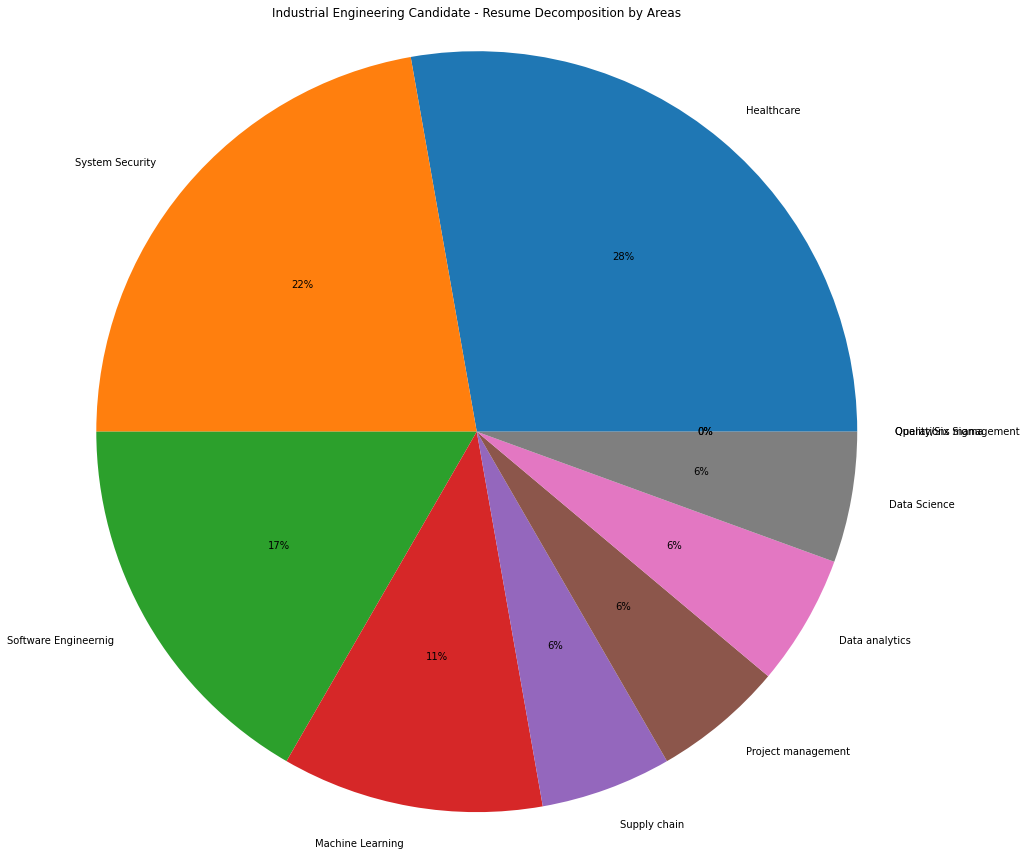

In [22]:
# Create pie chart visualization
pie = plt.figure(figsize=(15,15))
plt.pie(summary['score'], labels=summary.index, explode = (0,0,0,0,0,0,0,0,0,0), autopct='%0.0f%%',shadow=False,startangle=0)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')

In [31]:
def get_number_of_pages(file_name):
    try:
        if isinstance(file_name, io.BytesIO):
            # for remote pdf file
            count = 0
            for page in PDFPage.get_pages(file_name,caching=True,check_extractable=True):
                count += 1
            return count
        else:
            # for local pdf file
            if file_name.endswith('.pdf'):
                count = 0
                with open(file_name, 'rb') as fh:
                    for page in PDFPage.get_pages(
                        fh,
                        caching=True,
                        check_extractable=True
                    ):
                        count += 1
                return count
            else:
                return None
    except PDFSyntaxError:
        return None

In [32]:
## test get_number_of_pages function
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+resume
    noOfLines = get_number_of_pages(path)
    print(path ,'has ',noOfLines, 'pages')
    print('----------------------------')

data/Profile (1).pdf has  2 pages
----------------------------
data/Profile (10).pdf has  1 pages
----------------------------
data/Profile (11).pdf has  2 pages
----------------------------
data/Profile (12).pdf has  2 pages
----------------------------
data/Profile (13).pdf has  1 pages
----------------------------
data/Profile (14).pdf has  1 pages
----------------------------
data/Profile (15).pdf has  2 pages
----------------------------
data/Profile (16).pdf has  2 pages
----------------------------
data/Profile (17).pdf has  1 pages
----------------------------
data/Profile (18).pdf has  1 pages
----------------------------
data/Profile (19).pdf has  1 pages
----------------------------
data/Profile (2).pdf has  3 pages
----------------------------
data/Profile (20).pdf has  1 pages
----------------------------
data/Profile (21).pdf has  1 pages
----------------------------
data/Profile (22).pdf has  1 pages
----------------------------
data/Profile (23).pdf has  2 pages
-------

### Get Entities from Corpus

In [36]:
def extract_entities_wih_custom_model(custom_nlp_text):
    '''
    Helper function to extract different entities with custom
    trained model using SpaCy's NER

    :param custom_nlp_text: object of `spacy.tokens.doc.Doc`
    :return: dictionary of entities
    '''
    entities = {}
    for ent in custom_nlp_text.ents:
        if ent.label_ not in entities.keys():
            entities[ent.label_] = [ent.text]
        else:
            entities[ent.label_].append(ent.text)
    for key in entities.keys():
        entities[key] = list(set(entities[key]))
    return entities


In [39]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    get_the_entity_sections =extract_entities_wih_custom_model(doc)
    print(get_the_entity_sections)
    print('----------------')

{'PERSON': ['mohamednassar96', 'Embedded Software Engineer', 'Layout Analysis', 'Mohamed Nassar'], 'ORG': ['Synapse Analytics', 'Cairo University | AI', 'Computer Vision', 'Computer Communication Engineering', 'Deep Learning Engineer/Data Scientist', 'Microsoft Hall', 'Microsoft', 'Leading Azka-OCR Division', 'Machine Learning Team', 'El-Dostor Electronic Newspaper', 'Text Extraction', 'Information Extraction', 'Cairo University', 'NLP', 'Yahoo', 'Egypt\n\nERC Team - Faculty Of Engineering', 'OMR', 'OCR', 'Azka-\n\n', 'Computer Engineering'], 'WORK_OF_ART': ['Candidate'], 'DATE': ['July 2018', 'December 2019', 'May 2021', '3 years', 'November 2021', 'January 2014', 'June 2013', '5 months', 'June 2015', 'January 2013', '9 years', 'October 2013', 'November 2018', 'January 2016', '2019\xa0-\xa02022', '2 years 1 month', 'December 2018', '2 years', 'January 2010', '3 years 1 month', '2013\xa0-\xa02018', '8 months'], 'NORP': ['Arabic'], 'GPE': ['Egypt', 'Cairo'], 'CARDINAL': ['1', '2']}
----

{'DATE': ['April 2021', 'September 2020\xa0-\xa0', '2017\xa0-\xa02022', 'July 2021', '2015\xa0', 'May 2021', 'mahmoud3899', 'March 2021', '6 october', '2017', '3 months', 'November 2020', '2 months'], 'LOC': ['Arduino\n\n'], 'ORG': ['Machine Learning Engineer', 'Convolutional Neural Networks', 'YOLO', 'Computer Vision', 'Mobile\n\n', 'Certifications', 'Java', 'HTML', 'UX', 'YAT', 'UI', 'AutoKeras', 'IEEE ZSB RAS', 'Introduction', 'CSS', 'KerasTuner', 'Computer Vision Basics', 'COCO', 'Zagazig University', 'IEEE ZSB CS', 'Diploma', 'Computer Engineering'], 'GPE': ['Egypt', 'New York City Metropolitan Area', 'Cairo'], 'PERSON': ['Build Script', 'Android Developer Intern', 'Bachelor'], 'MONEY': ['2\n\n\x0c \xa0\n\n\xa0\n\n\xa0\n\nMachine Learning'], 'NORP': ['Optuna\n\n'], 'CARDINAL': ['2']}
----------------
{'CARDINAL': ['1', '01100240054'], 'ORG': ['Freelancer.com', 'Assiut University', 'Certifications', 'SQL', 'Pandas\n\nLearning Data Analytics', 'Nanodegree Program', 'Data Science\n\n

{'ORG': ['Information Technology', 'Deep Learning Specialization', 'Ibtikar Technologies', 'Cairo University', 'SQL'], 'LANGUAGE': ['English', 'Arabic'], 'GPE': ['Egypt', 'Cairo', 'Yemen'], 'DATE': ['January 2020\xa0-\xa0', '4 years 8 months', 'December 2019', '6 months', 'April 2017', 'August 2011\xa0-\xa0', 'July 2021', 'September 2012', '9 months', '2004\xa0-\xa02008', '2 years 8 months', 'April 2011', '1 year 2 months', 'August 2010', 'February 2017', 'February 2013', '2008\xa0-\xa02012', 'April 2014', 'March 2014', 'May 2017', '2 years', '4 years 11 months', '3 years 1 month', '2002\xa0-\xa02003', '2017\xa0-\xa02022'], 'PERSON': ['Al Jizah'], 'MONEY': ['2\n\n\x0c \xa0\n\n\xa0\n\n\xa0\n\n'], 'CARDINAL': ['2']}
----------------
{'PERSON': ['Programmer', 'Mahmoud Shawky'], 'CARDINAL': ['1', '200'], 'ORG': ['Mansoura University', 'AI\n\nSoftware Engineering Virtual', 'Computer Engineering'], 'DATE': ['1 year 2 months', '2019\xa0-\xa02024', 'September', 'November 2020\xa0-\xa0', '2021'

{'FAC': ['Deep Learning'], 'ORG': ['Sheharyar Asif', 'National University of Computer and Emerging Sciences', 'NLP'], 'PERSON': ['Rawalpindi\n\n'], 'GPE': ['Pakistan', 'Punjab', 'YouCan', 'Rawalpindi'], 'DATE': ['January 2021', '1 year 8 months', 'October 2021', '3 months', 'June 2019'], 'CARDINAL': ['1']}
----------------
{'ORG': ['Data Analytics', 'Computer Programming', 'Data Analysis', 'JavaScript', 'Clean\n\n'], 'PERSON': ['Ahmed Ayman', 'Bachelor'], 'PRODUCT': ['ahmedayman.aa191@gmail.com\n\n'], 'LOC': ['Machine Learning'], 'LANGUAGE': ['English', 'Arabic'], 'GPE': ['Egypt'], 'DATE': ['3 years', '2018', 'January 2019'], 'CARDINAL': ['2014', '1']}
----------------
{'WORK_OF_ART': ['arslan-ma141', 'Programming Language'], 'PERSON': ['Muhammad Arslan', 'Lahore'], 'DATE': ['1 year 4 months', 'September', '7 months', 'May 2021', '9 months', '2014\xa0-\xa02018', 'June 2021'], 'GPE': ['Punjab', 'District', 'Pakistan', 'Lahore'], 'ORG': ['Lancaster University'], 'CARDINAL': ['1']}
------

In [49]:
def extract_entity_sections_professional(text):
    '''
    Helper function to extract all the raw text from sections of
    resume specifically for professionals

    :param text: Raw text of resume
    :return: dictionary of entities
    '''
    text_split = [i.strip() for i in text.split('\n')]
    entities = {}
    key = False
    for phrase in text_split:
        if len(phrase) == 1:
            p_key = phrase
        else:
            p_key = set(phrase.lower().split()) & set(cs.RESUME_SECTIONS_PROFESSIONAL)
        try:
            p_key = list(p_key)[0]
        except IndexError:
            pass
        if p_key in cs.RESUME_SECTIONS_PROFESSIONAL:
            entities[p_key] = []
            key = p_key
        elif key and phrase.strip():
            entities[key].append(phrase)
    return entities


In [48]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    get_the_entity_sections =extract_entity_sections_professional(raw_text)
    print(get_the_entity_sections)
    
    print('----------------')

{'skills': ['Computer Vision', 'Data Analysis', 'Natural Language Processing (NLP)'], 'certifications': ['twitter hall of fame', 'Microsoft Hall of fame', 'Microsoft Students Stars', 'Competition', 'Yahoo hall of fame', 'Mohamed Nassar', 'Machine Learning Team Lead at Synapse Analytics|MSc Candidate', 'in Computer Communication Engineering at Cairo University | AI', 'Instructor', 'Giza'], 'summary': [], 'experience': ['Synapse Analytics', '2 years 1 month', 'Machine Learning Team Lead', 'May 2021\xa0-\xa0Present\xa0(8 months)', 'Cairo, Egypt', 'Deep Learning Engineer/Data Scientist.', 'December 2019\xa0-\xa0November 2021\xa0(2 years)', 'Cairo Governorate, Egypt', 'Self Employed', '9 years', '.Net Developer', 'January 2010\xa0-\xa0December 2018\xa0(9 years)', 'Security Researcher', 'January 2013\xa0-\xa0January 2016\xa0(3 years 1 month)', 'Valeo', 'Embedded Software Engineer', 'Page 1 of 2', 'July 2018\xa0-\xa0November 2018\xa0(5 months)', 'Cairo Governorate, Egypt', 'ERC Team - Faculty

{'skills': ['Web Development', 'Design', 'Graphics'], 'certifications': ['Certificate of completion -', 'Introduction to Data and Data', 'Science', 'Ahmed Fathi', 'data science enthusiast || civil engineer || future data scientist', 'Giza'], 'summary': ['Hello,', 'I Am Ahmed Fathi', 'Front End Developer', 'Develop Myself'], 'experience': ['And Trained A Lot, I Am A Fast Learner And Always Love To', 'National Telecommunication Institute (NTI)', 'Student', 'October 2021\xa0-\xa0Present\xa0(3 months)', 'PETROJET', 'Trainee', 'June 2019\xa0-\xa0August 2020\xa0(1 year 3 months)', 'worked as a trainee civil engineer in somid project'], 'education': ['technology', 'technical,\xa0Computer Systems Networking \xa0·\xa0(2013\xa0-\xa02015)', 'Ain Shams University', "Bachelor's degree,\xa0Civil Engineering\xa0·\xa0(2015\xa0-\xa02020)", 'National Telecommunication Institute (NTI)', 'Higher National Diploma,\xa0web design\xa0·\xa0(2021\xa0-\xa02021)', 'Page 1 of 1']}
----------------
{}
-------------

{'skills': [], 'leadership': ['Arduino', 'Electronics'], 'certifications': ['Convolutional Neural Networks', 'HCIA-AI', 'Structuring Machine Learning', 'Projects', 'Computer Vision Basics', 'Introduction to Internet of things', 'Mahmoud Reda', 'Machine Learning Engineer', 'Cairo'], 'summary': ['Majoring in Computer Engineering, a technology and science', 'enthusiast with the ability to learn rapidly and cooperate. Very', 'flexible and willing to be pushed to the limits when it comes to', 'working. Ex-intern at DevisonX as well as YAT both worked as', 'a software engineer as Machine Learning Engineer and Mobile', 'Android Developer.. Experienced in student activities as being a', 'DSC founder , Member at IEEE ZSB CS and', 'vice chairman at IEEE ZSB RAS.'], 'experience': ['Omdena', 'Junior Machine Learning Engineer', 'May 2021\xa0-\xa0July 2021\xa0(3 months)', 'Egypt', 'Spurwing', 'Software Engineer Intern', 'March 2021\xa0-\xa0April 2021\xa0(2 months)', 'New York City Metropolitan Area'

{'skills': ['English', 'Research'], 'education': ['Zagazig University', 'Artificial Intelligence (AI)', 'Science\xa0·\xa0(2020\xa0-\xa02024)', 'Bachlor of Artificial intelligence and data science,\xa0Computer', 'Page 1 of 1']}
----------------
{'certifications': ['AWS Machine Learning Foundations', 'Intermediate Python', 'Introduction to Data Visualization', 'with Plotly in Python', 'Amr El Agoz', 'Artificial Intelligence Intern at ITI | Machine Learning Engineer |', 'Embedded Systems Engineer', 'Egypt'], 'summary': ['Fresh graduate embedded systems engineer, worked with various', 'platforms and programming languages including:', 'Introduction to Python', 'Microcontrollers: AVR, Tiva C LaunchPad, STM32F4xx, ESP8266', 'Introduction to Statistics in Python', 'NodeMCU', 'Programming languages: C, C++, Python', 'Tools: Eclipse IDE, KEIL IDE, Atmel Studio', '>Also worked with machine learning and communication protocols', 'such:', 'Analysis)', 'Machine learning algorithms: Linear Regression

{'skills': ['SQL', 'C#', 'Machine Learning', 'Languages', 'English (Professional Working)', 'Arabic (Native or Bilingual)'], 'certifications': ['Big Data Engineer - Explorer Award', 'for Students 2018', 'Machine Learning Using SAS Viya', 'Big Data Engineer - Mastery Award', 'for Students 2018', 'Deep Learning Specialization', 'OFSAA - Financial Crime and', 'Compliance Management (FCCM)', 'Solution Engineer Specialist', 'Fakhraddin Alwajih', 'Data Scientist at Ibtikar Technologies', 'Egypt'], 'experience': ['Ibtikar Technologies', 'Data Scientist', 'July 2021\xa0-\xa0Present\xa0(6 months)', 'DataGear', '4 years 8 months', 'Data Scientist', 'January 2020\xa0-\xa0Present\xa0(2 years)', 'ETL Developer', 'May 2017\xa0-\xa0December 2019\xa0(2 years 8 months)', 'Faculty of Computers and Information - Cairo University', 'PhD Candidate', 'February 2017\xa0-\xa0Present\xa0(4 years 11 months)', 'Giza, Al Jizah, Egypt', 'Ibb University', 'Software Engineer | Assistant Lecturer', 'April 2014\xa0-\x

{'summary': ['AI, machine learning, data science and python are my passion .', 'Python (Programming Language)'], 'experience': [], 'skills': ['Orange Jordan', 'Data Scientist', 'September 2021\xa0-\xa0Present\xa0(4 months)', 'Amman, Jordan', 'data science projects', 'PSD', 'Data Scientist', 'May 2021\xa0-\xa0Present\xa0(8 months)', 'Amman, Jordan', 'Head of PSD team at Orange AI incubator working on machine learning and', 'Working on establishing AI and data science section in PSD', 'JGF (Jordan Gendarmerie Force )', 'IT & telecommunications procurement engineer', 'May 2012\xa0-\xa0May 2021\xa0(9 years 1 month)', 'Amman', 'United Nations', 'joint operation officer', 'February 2016\xa0-\xa0May 2017\xa0(1 year 4 months)', 'Sudan', 'Joint operation officer at UN mission in Darfuor/Sudan (UNAMID)', 'JGF ( Jordan Gendarmerie Force)', 'Data center administrator', 'November 2009\xa0-\xa0May 2012\xa0(2 years 7 months)'], 'certifications': ['Introduction to Data Science', 'Machine learning'], '

{'skills': ['Project Management', 'Quality Control', 'Business Operations'], 'certifications': [], 'summary': ['Experienced Operations Officer with a demonstrated history of', 'working in the apparel and fashion industry. Skilled in Business', 'Operations, Quality Control, Python (Programming Language), SQL,', 'and Microsoft Excel. Strong business development professional', "with a Bachelor's degree focused in Computer science from Bahria", 'Introduction to Data Engineering', 'University.', 'Databases and SQL for Data', 'Science with Python'], 'experience': ['Reverb Universe Apparel', 'Web Developer and Analyst', 'November 2019\xa0-\xa0Present\xa0(2 years 2 months)', 'Karāchi, Sindh, Pakistan', 'International Watch Company', 'Order Database Manager', 'April 2020\xa0-\xa0March 2021\xa0(1 year)', 'Karāchi, Sindh, Pakistan', 'National Investment Trust Limited', 'Intern Information Technology Department', 'July 2019\xa0-\xa0September 2019\xa0(3 months)', 'Karāchi, Sindh, Pakistan'], 'educa

In [55]:
def get_number_of_months_from_dates(date1, date2):
    '''
    Helper function to extract total months of experience from a resume

    :param date1: Starting date
    :param date2: Ending date
    :return: months of experience from date1 to date2
    '''
    if date2.lower() == 'present':
        date2 = datetime.now().strftime('%b %Y')
    try:
        if len(date1.split()[0]) > 3:
            date1 = date1.split()
            date1 = date1[0][:3] + ' ' + date1[1]
        if len(date2.split()[0]) > 3:
            date2 = date2.split()
            date2 = date2[0][:3] + ' ' + date2[1]
    except IndexError:
        return 0
    try:
        date1 = datetime.strptime(str(date1), '%b %Y')
        date2 = datetime.strptime(str(date2), '%b %Y')
        months_of_experience = relativedelta.relativedelta(date2, date1)
        months_of_experience = (months_of_experience.years
                                * 12 + months_of_experience.months)
    except ValueError:
        return 0
    return months_of_experience



In [50]:
def get_total_experience(experience_list):
    '''
    Wrapper function to extract total months of experience from a resume

    :param experience_list: list of experience text extracted
    :return: total months of experience
    '''
    exp_ = []
    for line in experience_list:
        experience = re.search(r'(?P<fmonth>\w+.\d+)\s*(\D|to)\s*(?P<smonth>\w+.\d+|present)',line,re.I)
        if experience:
            exp_.append(experience.groups())
    total_exp = sum([get_number_of_months_from_dates(i[0], i[2]) for i in exp_])
    total_experience_in_months = total_exp
    return total_experience_in_months



In [54]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    get_the_entity_sections =extract_entity_sections_professional(raw_text)
    experience_list = get_the_entity_sections['experience'] if 'experience' in get_the_entity_sections else []
    print(get_total_experience(experience_list))
    print('----------------')

212
----------------
4
----------------
56
----------------
137
----------------
0
----------------
8
----------------
393
----------------
0
----------------
16
----------------
0
----------------
0
----------------
0
----------------
7
----------------
0
----------------
0
----------------
127
----------------
7
----------------
8
----------------
66
----------------
9
----------------
0
----------------
0
----------------
0
----------------
0
----------------
0
----------------
1
----------------
0
----------------
8
----------------
0
----------------
8
----------------
50
----------------
0
----------------
25
----------------
35
----------------
28
----------------
116
----------------
187
----------------
28
----------------
18
----------------
0
----------------
6
----------------
3
----------------
0
----------------
10
----------------
0
----------------
93
----------------
8
----------------
31
----------------
68
----------------
0
----------------
5
----------------
38
---

In [76]:
def extract_email(text):
    '''
    Helper function to extract email id from text

    :param text: plain text extracted from resume file
    '''
    #\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b
    #([^@|\s]+@[^@]+\.[^@|\s]+)
    email = re.findall(r"(\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b)", text)
    if email:
        try:
            return email[0].split()[0].strip(';')
        except IndexError:
            return None


In [77]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    email = extract_email(raw_text)
    print(email)
    print('----------------')

mohamednassar2016@gmail.com
----------------
m.gamal202180@gmail.com
----------------
asmaa.y.ibrahim@gmail.com
----------------
shoroouqalshal@gmail.com
----------------
nabeelmunir378@gmail.com
----------------
None
----------------
zoro41111@gmail.com
----------------
m.abdelslam00259@sci.dmu.ed
----------------
ahmedfathi520@gmail.com
----------------
eng.gamal.nafel@gmail.com
----------------
alnagar.ashraf545@gmail.com
----------------
sakra7265@gmail.com
----------------
yousefessamjoe@gmail.com
----------------
None
----------------
mohmedrashad818@gmail.com
----------------
ahmedhateeem@gmail.com
----------------
redamahmoud722@gmail.com
----------------
mhmdelsabaa20@gmail.com
----------------
ahmedelsyd5@gmail.com
----------------
hamzaqureshi634@gmail.com
----------------
aa6303463@gmail.com
----------------
sarawageeh396@gmail.com
----------------
afzaalmuhammad1151@gmail.co
----------------
amargamal832909@gmail.com
----------------
HosamHasan667666@gmail.com
------------

In [101]:
import constants as cs

In [106]:
def extract_name(nlp_text, matcher):
    '''
    Helper function to extract name from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param matcher: object of `spacy.matcher.Matcher`
    :return: string of full name
    '''
    pattern = [cs.NAME_PATTERN]

    matcher.add('NAME', None, *pattern)
    matcher.add("PERSON",None, *pattern)
    matcher.add("USER",None, *pattern)
    matches = matcher(nlp_text)

    for _, start, end in matches:
        span = nlp_text[start:end]
        if 'name' not in span.text.lower():
            return span.text


In [103]:
from spacy.matcher import Matcher

In [107]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    matcher = Matcher(nlp.vocab)
    name = extract_name(doc,matcher)
    print(name)
    print('----------------')

Top Skills
----------------
Mohamed Gamal
----------------
Top Skills
----------------
Top Skills
----------------
Mstr Nabeel
----------------
Top Skills
----------------
Mohamed Mostafa
----------------
Data Scientist
----------------
Top Skills
----------------
Gamal Nafel
----------------
Programming Language
----------------
Al Gharbiyah-
----------------
Yousef Essam
----------------
Top Skills
----------------
Mohamed Rashad
----------------
Ahmed Hatem
----------------
Top Skills
----------------
Top Skills
----------------
Top Skills
----------------
Hamza Qureshi
----------------
Ahmed Ali
----------------
Top Skills
----------------
Islamia University
----------------
Top Skills
----------------
Hossam Hassan
----------------
Top Skills
----------------
Omar Adam
----------------
Top Skills
----------------
Abd Elbadea
----------------
AWS Machine
----------------
Mohamed Aboelenien
----------------
Mohamed Ahmed
----------------
Top Skills
----------------
Ahmed Zaroath
---

In [113]:
def extract_mobile_number(text, custom_regex=None):
    '''
    Helper function to extract mobile number from text

    :param text: plain text extracted from resume file
    :return: string of extracted mobile numbers
    '''
    # Found this complicated regex on :
    # https://zapier.com/blog/extract-links-email-phone-regex/
#     mob_num_regex = r'''(?:(?:\+?([1-9]|[0-9][0-9]|
#         [0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|
#         [2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|
#         [0-9]1[02-9]|[2-9][02-8]1|
#         [2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|
#         [2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{7})
#         (?:\s*(?:#|x\.?|ext\.?|
#         extension)\s*(\d+))?'''
    if not custom_regex:
        mob_num_regex = r'''(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)
                        [-\.\s]*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})'''
        phone = re.findall(re.compile(mob_num_regex), text)
    else:
        phone = re.findall(re.compile(custom_regex), text)
    if phone:
        number = ''.join(phone[0])
        return number


In [115]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    #nlp = spacy.load("en_core_web_sm")
    #doc = nlp(raw_text)
    #matcher = Matcher(nlp.vocab)
    number = extract_mobile_number(raw_text)
    print(number)
    print('----------------')

  

 

Contact

mohamednassar2016@gmail.com

www.linkedin.com/in/
mohamednassar96 (LinkedIn)

Top Skills

Computer Vision

Data Analysis

Natural Language Processing (NLP)

Certifications

twitter hall of fame

Microsoft Hall of fame

Microsoft Students Stars
Competition

Yahoo hall of fame

 

Mohamed Nassar

Machine Learning Team Lead at Synapse Analytics|MSc Candidate
in Computer Communication Engineering at Cairo University | AI
Instructor
Giza

Summary

- AI Team Lead with 3 years of experience in Computer Vision

and Natural Language Processing handling the whole pipeline of

design, development, testing, and deployment into production.

Currently, Leading Azka-OCR Division in Synapse Analytics. Azka-

OCR is involved in Arabic Documents end-to-end analysis through

Document Detection, Layout Analysis, Text Extraction, OCR, and
finally Information Extraction.

Optical mark recognition (OMR)

- AI instructor.

Experience

Synapse Analytics
2 years 1 month

Machine Learning Team Le

  

 

 

Mohamed A. Gharieb

Data Scientist Intern at Google
ةيردنكسالا

لاصتالا

Al Mandarah Bahri, Montaza 2,
Alexandria Governorate, 21919
Montaza (Egypt) 
01022487565 (Mobile)
m.abdelslam00259@sci.dmu.ed
u.eg

www.linkedin.com/in/mohamed-a-
gharieb-29172b205 (LinkedIn)

زجوم

تاراهملا لضفأ

Web Development

Programming

Microsoft Office

Languages

Arabic (Native or Bilingual)

English (Full Professional)

Certifications

Programming Foundations: Software
Testing/QA

Programming Foundations:
Fundamentals

Demystifying AI/ML/DL

Data Analytics Fundamentals

AWS Database Offerings

Entry-level data analytics professional recently completed

the Google Data Analytics Professional Certificate. Excellent

understanding and proficiency of platforms for effective data

analyses, including SQL, Sheets, Excel, Tableau, and R. Strong

communication, organizational, and analytical skills.

ةربخلا

صوصرملا ناينبلاك
Software Engineer Intern
٢٠٢١ ربمتبس‏ - Present (4 روهش)
Egypt

in this import

  

 

 

Contact

yousefessamjoe@gmail.com

www.linkedin.com/in/yousef-
essam-420463211 (LinkedIn)

Yousef Essam

IBM Data Science Certified | Data Science Trainee at IBM
Giza

Summary

Python (Programming Language)

learning ,Data Science , Cloud Computing and have good

I am a computer science student who interested in Machine

experience in C++ , Java ,Python , Dart , Problem Solving and Eager

to learn new technologies

Top Skills

oop

Data Science

Languages

English

Arabic

Certifications

Foundations: Data, Data,
Everywhere

Data Visualization Using Python

Algorithmic Toolbox

Flutter: Part 03 Flutter Widgets

Python for Data Science and AI

Experience

IBM
Data Science Intern
August 2021 - October 2021 (3 months)

Route
Flutter Developer Intern
July 2021 - September 2021 (3 months)
Egypt

Huawei ICT Academy-Egypt
Cloud Intern
December 2019 - March 2020 (4 months)
Cairo, Egypt

Education

Cairo University

Bachelor's degree, Computer Science · (2018 - 2022)

Page 1 of 1


4

 Contact

01010483839 (Mobile)
ahmedelsyd5@gmail.com

www.linkedin.com/in/ahmed-
hindi-358a77123 (LinkedIn)
ahmedhindi.medium.com/ (Blog)

Top Skills

Python

Machine Learning

Data Science

Languages

English (Professional Working)

Arabic (Native or Bilingual)

Certifications

Applied Data Science with Python
Specialization

The Data Scientist’s Toolbox

Applied Plotting, Charting & Data
Representation in Python

Introduction to Probability and Data

Applied Text Mining in Python

 

 

 

Ahmed Hindi

Senior Machine Learning Engineer at Indeed.com
Cairo

Summary

Data Scientist familiar with gathering, cleaning, and organizing data

for use by technical and non-technical personnel. Due to working

for five years on Upwork, I have experience working with people

from different backgrounds, communicating the data at many levels

of abstraction dealing with tech and non-tech clients. And during

the five years, I was able to maintain a perfect record by finishing

all projects successf

  

 

 

Mohamed Ahmed Gomaa

Artificial Intelligence and ML Trainee at ITI (9-Month)
Al Jizah

Summary

Contact

01124545040 (Mobile)
m.ahmed9788@gmail.com

www.linkedin.com/in/mohamed-
ahmed-gomaa (LinkedIn)

Top Skills

Artificial Intelligence (AI)

Data Science

Natural Language Processing (NLP)

graduated from ITI AI-Pro 9 months intake 1 in 2021. I worked on

Engineer specializing in artificial intelligence and data science. I

various AI and data science projects at ITI and Kaggle.

I'm excited to learn new things and develop my technical and soft

abilities. Now I'm on the lookout for a decent chance to pursue my

Certifications

Analyzing Police Activity with pandas

Exploratory Data Analysis in Python

Python Fundamentals Track

Hyperparameter Tuning in Python

Intermediate Machine Learning

passion.

Education

 · (2021 - 2022)

Information Technology Institute (ITI)

Helwan University Cairo

Bachelor's degree, Computer Science · (2015 - 2019)

Page 1 of 1


0112454504
---

  

 

لاصتالا

01157173830 (Mobile)
hanyabdousaadhussien@gmail.
com

www.linkedin.com/in/hany-
abdou-731b831a1 (LinkedIn)

تاراهملا لضفأ

data structure

Java

C++

Certifications

Artificial Intelligence V2

Data Analysis Professional
Nanodegree

HCIA-Big Data

Database Fundamentals

Coding Intro

 

Hany Abdou

Undergraduate CS | Data science and ML Enthusiast
ةرهاقلا

Artificial Intelligence and data science researcher, a trainee at IBM

and Huawei ICT Academy, a junior problem solver at ACM Egypt.

زجوم

ةربخلا

Huawei ICT Academy-Egypt
Data Science Trainee
روهش 4) ٢٠٢٠ ربمتبس‏ - ٢٠٢٠ وينوي‏)
Cairo, Egypt

ميلعتلا

Luxor University

Student, Computer Science · (2018 - 2022)

Page 1 of 1


0115717383
----------------
 Contact

+923329369443 (Home)
hamzarizwan8822@gmail.com

www.linkedin.com/in/
hamzarizwan1 (LinkedIn)

Top Skills

Test Planning

Product Quality

Software Development

 

 

 

Hamza Rizwan

Software Quality Assurance Engineer at Red Buffer
Rawalpindi District

Summ

  

 

Contact

Cairo, Egypt 
01026422723 (Home)
hemamostafa00100@gmail.com

www.linkedin.com/in/ibrahim-
mostafa-426997129 (LinkedIn)

Top Skills

Python

Machine Learning

Deep Learning

Languages

English

Arabic

French

Certifications

 

Ibrahim Mostafa

AI Trainee at Information Technology Institute ITI
Cairo

Summary

I 'm a software engineer , having a different technical background

with  passion in machine learning and data science specifically,

currently training at ITI in AI track 9 month

Experience

Information Technology Institute (ITI)
(AI) Trainee at Information Technology Institute (ITI)
April 2021 - Present (9 months)
Cairo, Egypt

Natural Language Processing with
Classification and Vector Spaces

Certificate of completion -
Convolutional Neural Networks with
TensorFlow in Python

Data Scientist with Python Track

Certificate of completion - Deep
Learning with TensorFlow 2

Education

El Minia University

Graduated Year, Computer Science

Page 1 of 1


0102642272


  

 

 

Contact

victor.myid@gmail.com

www.linkedin.com/in/s-victor-
kumar-12a719226 (LinkedIn)

S VICTOR KUMAR

Machine Learning Enthusiast | Student at Heritage Institute of
Technology
Gaya

Top Skills

Engineering

Communication

Strategy

Languages

English (Full Professional)

Hindi (Full Professional)

Education

Heritage Institute of Technology

Bachelor of Technology - BTech, Artificial Intelligence · (2021 - 2025)

Nazareth academy gaya

Intermediate, Science · (July 2018 - March 2020)

Page 1 of 1


None
----------------
  

 

Contact

ahmed.abbas1296@gmail.com

www.linkedin.com/in/ahmed-
abbas1296 (LinkedIn)

Top Skills

Data Analysis

Data Visualization

Python (Programming Language)

Certifications

Big Data Engineer on Cloud Mastery
Award

Data Analyst Nanodegree

Data Scientist with Python

 

Ahmed Hesham Abbas

Data Scientist at Orange Egypt
Egypt

Experience

Orange Egypt
Data Scientist
June 2021 - Present (7 months)
Egypt

Nana | عانعن
Data Scientist
October 202

In [116]:
def extract_skills(nlp_text, noun_chunks, skills_file=None):
    '''
    Helper function to extract skills from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param noun_chunks: noun chunks extracted from nlp text
    :return: list of skills extracted
    '''
    tokens = [token.text for token in nlp_text if not token.is_stop]
    if not skills_file:
        data = pd.read_csv(
            os.path.join(os.path.dirname(__file__), 'skills.csv')
        )
    else:
        data = pd.read_csv(skills_file)
    skills = list(data.columns.values)
    skillset = []
    # check for one-grams
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)

    # check for bi-grams and tri-grams
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    return [i.capitalize() for i in set([i.lower() for i in skillset])]



In [117]:
import spacy

In [119]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    number = extract_mobile_number(raw_text)

    print(extract_skills(doc,doc.noun_chunks,'skills.csv'))

['Twitter', 'Ai', 'Communication', 'Design', '.net', 'Engineering', 'Testing', 'Newspaper', 'Data analysis', 'Electrical', 'Analytics', 'Security', 'Analysis', 'Electronics']
['Ai', 'Certification', 'Engineering', 'Data analysis', 'Tableau', 'Machine learning', 'Analysis', 'Keras']
['Communication', 'Microsoft office', 'Computer science', 'Algorithms', 'Data analysis', 'Security', 'Excel', 'Word', 'Mathematics', 'Teaching', 'Analysis', 'Programming', 'Microsoft excel']
['Ai', 'Design', 'Engineering', 'Real estate', 'Python', 'Technical', 'Machine learning', 'Programming', 'Hardware']
['Analytical', 'Communication', 'Engineering', 'Analytical skills']
['Pandas', 'Engineering', 'German', 'Spreadsheets', 'Sql', 'Mechanical engineering', 'Tableau', 'Analytics', 'Python', 'Excel', 'Microsoft excel', 'Analytical skills', 'English', 'Analytical', 'Process', 'Analysis', 'Programming', 'R']
['Ai', 'Quality management', 'Design', 'Engineering', 'System', 'Data analysis', 'Electrical', 'Training'

In [122]:
def extract_education(nlp_text):
    '''
    Helper function to extract education from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :return: tuple of education degree and year if year if found
             else only returns education degree
    '''
    edu = {}
    # Extract education degree
    #[sent.text.strip() for sent in nlp_text.sents]
    sentence =[sent.text.strip() for sent in nlp_text.sents]
    try:
        for index, text in enumerate(sentence):
            for tex in text.split():
                tex = re.sub(r'[?|$|.|!|,]', r'', tex)
                if tex.upper() in cs.EDUCATION and tex not in cs.STOPWORDS:
                    edu[tex] = text + sentence[index + 1]
    except IndexError:
        pass

    # Extract year
    education = []
    for key in edu.keys():
        year = re.search(re.compile(cs.YEAR), edu[key])
        if year:
            education.append((key, ''.join(year.group(0))))
        else:
            education.append(key)
    return education

In [123]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    education = extract_education(doc)
    print(education)

[('MS', '2019')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('Bscs', '2017')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('BSCS', '2016')]
['BSc']
['MS', ('SSC', '2014')]
[]
[('PhD', '2017')]
[]
[]
[]
[('BSCS', '2017')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('SSC', '2010')]
[('MS', '2016')]
[]
[]
[]
[('BTech', '2021')]
[]
[]
[]


In [128]:
def extract_experience(resume_text):
    '''
    Helper function to extract experience from resume text

    :param resume_text: Plain resume text
    :return: list of experience
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # word tokenization
    word_tokens = nltk.word_tokenize(resume_text)

    # remove stop words and lemmatize
    filtered_sentence = [
            w for w in word_tokens if w not
            in stop_words and wordnet_lemmatizer.lemmatize(w)
            not in stop_words
        ]
    sent = nltk.pos_tag(filtered_sentence)

    # parse regex
    cp = nltk.RegexpParser('P: {<NNP>+}')
    cs = cp.parse(sent)

    # for i in cs.subtrees(filter=lambda x: x.label() == 'P'):
    #     print(i)

    test = []

    for vp in list(
        cs.subtrees(filter=lambda x: x.label() == 'P')
    ):
        test.append(" ".join([
            i[0] for i in vp.leaves()
            if len(vp.leaves()) >= 2])
        )

    # Search the word 'experience' in the chunk and
    # then print out the text after it
    x = [
        x[x.lower().index('experience') + 10:]
        for i, x in enumerate(test)
        if x and 'experience' in x.lower()
    ]
    return x

In [130]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mmazhar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [131]:

for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    #nlp = spacy.load("en_core_web_sm")
    #doc = nlp(raw_text)
    education = extract_experience(raw_text)
    print(education)

[' Synapse Analytics']
[' Epsilon AI Institute Machine Learning Engineer August']
[]
['d', ' Wady El Nil Contracting']
[]
[' Symbios Account Executive February']
[]
[]
['', '']
[]
[]
[' Information Technology Institute']
[' IBM Data Science Intern August']
[' Page']
[]
['d Business Intelligence Analyst', ' Vodafone']
['d', ' Omdena Junior Machine Learning Engineer May']
[' Freelancer.com Data Analyst April']
[]
[' KeepTruckin Data Analyst March']
[]
[]
[]
[]
[]
[' TIEC Accelerator Program Technical Support Team Lead September']
[' C']
[]
[]
[' ITI Artificial Intelligence Engineer April']
[' Valify Solutions Machine Learning Engineer March']
[]
[' Student University Engineering Technology']
[]
[' Deep Learning']
[' AllZone Tech']
[' Ibtikar']
[' Luminous MU Software Member September']
[' Electro Pi Computer Vision Trainee October']
[]
[]
[' Iconsols Intern September']
[' Top Skills Machine Learning Data Science Languages Arabic']
[]
[]
[' Blessings Company Web Developer January']
[' Inf

In [132]:
def get_number_of_pages(file_name):
    try:
        if isinstance(file_name, io.BytesIO):
            # for remote pdf file
            count = 0
            for page in PDFPage.get_pages(
                        file_name,
                        caching=True,
                        check_extractable=True
            ):
                count += 1
            return count
        else:
            # for local pdf file
            if file_name.endswith('.pdf'):
                count = 0
                with open(file_name, 'rb') as fh:
                    for page in PDFPage.get_pages(
                            fh,
                            caching=True,
                            check_extractable=True
                    ):
                        count += 1
                return count
            else:
                return None
    except PDFSyntaxError:
        return None

In [133]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    print('----------------------------')

  

 

Contact

mohamednassar2016@gmail.com

www.linkedin.com/in/
mohamednassar96 (LinkedIn)

Top Skills

Computer Vision

Data Analysis

Natural Language Processing (NLP)

Certifications

twitter hall of fame

Microsoft Hall of fame

Microsoft Students Stars
Competition

Yahoo hall of fame

 

Mohamed Nassar

Machine Learning Team Lead at Synapse Analytics|MSc Candidate
in Computer Communication Engineering at Cairo University | AI
Instructor
Giza

Summary

- AI Team Lead with 3 years of experience in Computer Vision

and Natural Language Processing handling the whole pipeline of

design, development, testing, and deployment into production.

Currently, Leading Azka-OCR Division in Synapse Analytics. Azka-

OCR is involved in Arabic Documents end-to-end analysis through

Document Detection, Layout Analysis, Text Extraction, OCR, and
finally Information Extraction.

Optical mark recognition (OMR)

- AI instructor.

Experience

Synapse Analytics
2 years 1 month

Machine Learning Team Le

  

 

 

Mohamed A. Gharieb

Data Scientist Intern at Google
ةيردنكسالا

لاصتالا

Al Mandarah Bahri, Montaza 2,
Alexandria Governorate, 21919
Montaza (Egypt) 
01022487565 (Mobile)
m.abdelslam00259@sci.dmu.ed
u.eg

www.linkedin.com/in/mohamed-a-
gharieb-29172b205 (LinkedIn)

زجوم

تاراهملا لضفأ

Web Development

Programming

Microsoft Office

Languages

Arabic (Native or Bilingual)

English (Full Professional)

Certifications

Programming Foundations: Software
Testing/QA

Programming Foundations:
Fundamentals

Demystifying AI/ML/DL

Data Analytics Fundamentals

AWS Database Offerings

Entry-level data analytics professional recently completed

the Google Data Analytics Professional Certificate. Excellent

understanding and proficiency of platforms for effective data

analyses, including SQL, Sheets, Excel, Tableau, and R. Strong

communication, organizational, and analytical skills.

ةربخلا

صوصرملا ناينبلاك
Software Engineer Intern
٢٠٢١ ربمتبس‏ - Present (4 روهش)
Egypt

in this import

  

 

Contact

+201007667914 (Mobile)
eng.mahmoud.essam.mohamed@g
mail.com

www.linkedin.com/in/eng-
mahmoud-essam-mohamed
(LinkedIn)
www.freelancer.com/u/
MahmoudEssam14 (Portfolio)
github.com/Mahmoud-Essam-
Mohamed-14 (Other)

Top Skills

SQL

Engineering

Languages

English (Professional Working)

Arabic (Native or Bilingual)

Certifications

Introductory Online Python
Programming Course

AWS ML Fundamental Course

Data Challenger Track

Data Analysis Track

Introduction to Data Science in
Python

 

Mahmoud Essam

Junior Data Scientist
Cairo

Summary

A Data Science/Machine Learning Enthusiast with a Bachelor

Degree in Mechanical Engineering and Management, Shifting

Towards Data Science, and Looking for new opportunities to apply

my new gained skills to solve business problems

Freelancer.com
Data Scientist
October 2020 - Present (1 year 3 months)
Cairo, Egypt

Education

Udacity

Professional Data Analysis Nanodegree  · (2020 - 2020)

Ain Shams University

Bachelor's degree, M


----------------------------
 Contact

hamzaqureshi634@gmail.com

www.linkedin.com/in/hamza-
qureshi-8915b5189 (LinkedIn)

 

Hamza Qureshi

Data Analyst
Pakistan

Experience

KeepTruckin
Data Analyst
March 2021 - Present (10 months)
Lahore, Punjab, Pakistan

 

 

Page 1 of 1


----------------------------
  

 

 

Ahmed Ali Nawar

Software engineer .. AI & Data science
Markaz El Zaqaziq

Summary

Contact

01124314860 (Mobile)
aa6303463@gmail.com

www.linkedin.com/in/ahmed-ali-
nawar-41ab301b9 (LinkedIn)

Top Skills

English

Python (Programming Language)

python .

Object-Oriented Programming
(OOP)

I am a Computer science with an experience in designing,

programming , Software and  troubleshooting  .. I have language

In addition to Al , ML , DL , DS  this, I have the ability to deal with

any problem under pressure. Moreover, my working experience

gained at home has allowed me to gain great practical experience

which will be helpful for my career as a professional engineer. 

  

 

 

Contact

mohamed.abolenien@gmail.com

www.linkedin.com/in/mohamed-
aboelenien-656594145 (LinkedIn)

Mohamed Aboelenien

Machine Learning Engineer at Valify Solutions
Egypt

Top Skills

JavaScript

Mobile Devices

SQL

Certifications

Summary

Computer engineering graduate and a Programming enthusiast,

always looking to gain knowledge and grow in the rising fields of

computer engineering.

Neural Networks and Deep Learning

Artificial Intelligence: Reinforcement
Learning in Python 

Improving Deep Neural Networks:
Hyperparameter tuning,
Regularization and Optimization

Publications

Reinforcement Learning Versus
Generative Adversarial Networks for
Video Summarization

Experience

Valify Solutions
Machine Learning Engineer
March 2020 - Present (1 year 10 months)

WebOps
Software Engineer
January 2019 - March 2020 (1 year 3 months)
Cairo Governorate, Egypt

Egyptian Military Force
IT/Soldier
October 2018 - December 2019 (1 year 3 months)

The German University in Cairo
Intern


 Contact

00201003371334 (Mobile)
fakhri100@gmail.com

www.linkedin.com/in/
fakhraddinalwajih (LinkedIn)

Top Skills

SQL

C#

Machine Learning

Languages

English (Professional Working)

Arabic (Native or Bilingual)

Certifications

Big Data Engineer - Explorer Award
for Students 2018

Machine Learning Using SAS Viya

Big Data Engineer - Mastery Award
for Students 2018

Deep Learning Specialization

OFSAA - Financial Crime and
Compliance Management (FCCM)
Solution Engineer Specialist

 

 

 

Fakhraddin Alwajih

Data Scientist at Ibtikar Technologies
Egypt

Experience

Ibtikar Technologies
Data Scientist
July 2021 - Present (6 months)

DataGear
4 years 8 months

Data Scientist
January 2020 - Present (2 years)

ETL Developer
May 2017 - December 2019 (2 years 8 months)

Faculty of Computers and Information - Cairo University
PhD Candidate
February 2017 - Present (4 years 11 months)
Giza, Al Jizah, Egypt

Ibb University
Software Engineer | Assistant Lecturer
April 2014 - April 2017 (3 y

  

 

 

Contact

Amman,jordan
00962798638109 (Mobile)
moh.momani@gmail.com

Mohammad Ibrahim Momani

Data scientist at Orange Jordan
Amman

www.linkedin.com/in/mohammad-
ibrahim-momani-50b80517
(LinkedIn)

Summary

AI, machine learning, data science and python are my passion .

Python (Programming Language)

Experience

Top Skills

Machine Learning

Data Science

Languages

Arabic (Native or Bilingual)

English (Professional Working)

Certifications

Introduction to Data Science

Machine learning 

Data science math skills

Orange Jordan
Data Scientist
September 2021 - Present (4 months)
Amman, Jordan

data science projects

PSD
Data Scientist
May 2021 - Present (8 months)
Amman, Jordan

Head of PSD team at Orange AI incubator working on machine learning and

Working on establishing AI and data science section in PSD

JGF (Jordan Gendarmerie Force )
IT & telecommunications procurement engineer
May 2012 - May 2021 (9 years 1 month)
Amman

United Nations
joint operation officer
Februar

  

 

 

لاصتالا

aliwagdy2580@gmail.com

www.linkedin.com/in/ali-wagdy-
a01510196 (LinkedIn)

Ali Wagdy

Machine Learning | Deep Learning | NLP
رصم

زجوم

تاراهملا لضفأ

machine learning

Deep Learning

Natural language processing

(NLP)

I'm a software engineer adept at analyzing datasets, machine

learning algorithms , deep learning and natural language processing

Hoping to become a valuable asset in any organization that I join

Languages

English (Professional Working)

ىبرع (Native or Bilingual)

Certifications

machine learning nanodegree 

Python 3: Programming beginner to
advanced

machine learning 

Neural Networks and Deep Learning

Contestant at ACM-ICPC

Honors-Awards

Participated at ACM Egyptian
Collegiate Programming Contest

ةربخلا

iNetworks
Machine Learning Intern
٢٠٢١ ربوتكأ‏ - Present (3 روهش)

ميلعتلا

MET

Computer Science · (2018 - 2022)

Stanford University

machine learning 

Page 1 of 1


----------------------------
  

 

 

Contact

elhamamsy.m.a@gmail.

## Categories the resumes and save as CSV

In [144]:
cs.terms.keys()

dict_keys(['Quality/Six Sigma', 'Operations management', 'Supply chain', 'Project management', 'Data analytics', 'Data Science', 'Machine Learning', 'Software Engineernig', 'System Security', 'Healthcare'])

In [145]:
## get score of resume
def get_resume_score(text):
    # Initializie score counters for each area
    quality = 0
    operations = 0
    supplychain = 0
    project = 0
    data = 0
    healthcare = 0

    # Create an empty list where the scores will be stored
    scores = {}

    # Obtain the scores for each area
    for area in cs.terms.keys():
        
        if area == 'Quality/Six Sigma':
            for word in cs.terms[area]:
                if word in text:
                    quality +=1
            #scores.append(quality)
            scores[area]=quality
        
        elif area == 'Operations management':
            for word in cs.terms[area]:
                if word in text:
                    operations +=1
            scores[area]=operations
        
        elif area == 'Supply chain':
            for word in cs.terms[area]:
                if word in text:
                    supplychain +=1
            scores[area] = supplychain
        
        elif area == 'Project management':
            for word in cs.terms[area]:
                if word in text:
                    project +=1
            scores[area] =project
        
        elif area == 'Data analytics':
            for word in cs.terms[area]:
                if word in text:
                    data +=1
            scores[area] =data
        
        else:
            for word in cs.terms[area]:
                if word in text:
                    healthcare +=1
            scores[area] =healthcare
    return scores

In [147]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    skills = ' '.join(extract_skills(doc,doc.noun_chunks,'skills.csv')) 
    score = get_resume_score(skills)
    max_val= max(score, key=score.get)
    print(score)
    print(max_val)

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operat

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 2, 'Data Science': 2, 'Machine Learning': 4, 'Software Engineernig': 6, 'System Security': 8, 'Healthcare': 8}
System Security
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 2, 'Software Engineernig': 3, 'System Security': 4, 'Healthcare': 4}
System Security
{'Quality/Six Sigma': 0, 'Operat

In [ ]:
resumeDataset= pd.read_csv('UpdatedResumeDataSet.csv', encoding = 'utf-8')

In [ ]:
resumeDataset

In [ ]:
resumeDataset['cleaned_resume'] =''

In [ ]:
resumeDataset

In [ ]:
# Display Distnict Resume categories
resumeDataset['Category'].uniqueque()

In [ ]:
resumeDataset['Category'].value_counts()

In [ ]:
import seaborn as sns 
plt.figure(figsize =(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data= resumeDataset)

In [ ]:

from matplotlib.gridspec import GridSpec
targetCounts = resumeDataset['Category'].value_counts()
targetLabels = resumeDataset['Category'].unique()

plt.figure(1,figsize=(25,25))
the_grid = GridSpec(2,2)

cmap= plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect =1, title ='Category Distribution')

souce_pie = plt.pie(targetCounts,labels =targetLabels, autopct= '%1.1f%%', shadow =True, colors= colors)
plt.show()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    

In [ ]:
resumeDataset['cleaned_resume'] = resumeDataset.Resume.apply(lambda x: cleanResume(x))

In [ ]:
resumeDataset['cleaned_resume'][0]

In [ ]:
pip install wordcloud

In [ ]:
import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [ ]:
onesetOfStopwords = set(stopwords.words('english')+['``',"''"])

In [ ]:
onesetOfStopwords

In [ ]:
totalWords =[]
Senetnces = resumeDataset['Resume'].values
cleanedSentences= ""
for i in range(0, 160):
    cleanedText = cleanResume(Senetnces[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in onesetOfStopwords and word not in string.punctuation:
            totalWords.append(word)

In [ ]:
wordfreqdist = nltk.FreqDist(totalWords)


In [ ]:
wordfreqdist

In [ ]:
mostcommon = wordfreqdist.most_common(50)
mostcommon

In [ ]:
# Convert all strings to lowercase


In [ ]:
wc  = WordCloud().generate(cleanedSentences)
plt.figure(figsize =(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataset[i]= le.fit_transform(resumeDataset[i])

In [ ]:
resumeDataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


In [ ]:
requiredText = resumeDataset['cleaned_resume'].values
requiredtarget = resumeDataset['Category'].values
requiredtarget

In [ ]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(WordFeatures,requiredtarget,random_state=0, test_size=0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train,Y_train)
prediction = model.predict(X_test)


In [ ]:
print('accuracy of KNNeighbors Classifier on training set :{:.2f}'.format(model.score(X_train,Y_train)))
print('accracy of KNeighbors Classifier on test set :{:.2f}'.format(model.score(X_test,Y_test)))

In [ ]:
print('\n Classification report for classifier %s: \n%s\n'% (model,metrics.classification_report(Y_test,prediction)))